# **Workflow de Alta Performance: Do Dado Bruto à Análise do Modelo de Classificação**
**(Dataset: Câncer de Mama de Wisconsin)**

## Etapa 0 - Definir objetivo

**Objetivo:** Formalizar o problema como uma **classificação binária**: prever se um tumor é Maligno ('M') ou Benigno ('B') com base nas medições fornecidas.


In [3]:
%pip install pandas numpy seaborn matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.



## **Etapa 1: Configuração do Ambiente e Compreensão dos Dados**

*   [ ] **1.1. Importar Bibliotecas Fundamentais:** `pandas` para manipulação de dados, `numpy` para operações numéricas, `matplotlib` e `seaborn` para visualização.
*   [ ] **1.2. Carregar o Dataset:** `pd.read_csv('data.csv')`.
*   [ ] **1.3. Inspeção Estrutural Imediata:**
    *   [ ] **Shape (`.shape`):** Entender as dimensões (quantas amostras e features temos?).
    *   [ ] **Tipos de Dados (`.info()`):** Verificar se as colunas estão com os `dtypes` corretos (numéricas como `float64`/`int64`, categóricas como `object`).
    *   [ ] **Visão Geral (`.head()`):** Inspecionar as primeiras linhas para entender a estrutura.


In [17]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
#import warnings 
# warnings.filterwarnings('ignore')


In [25]:
#  1.2 - Carregar o Dataset:** `pd.read_csv('data.csv')`.
data = pd.read_csv('data/data.csv', sep=',')
# Exibindo as primeiras linhas do DataFrame
#print(data.head())
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [38]:
data.shape

(569, 32)

In [13]:
data.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [39]:
print("----------- Informações Gerais do DataFrame -----------")
print("\n---> INFO <---")
data.info()

print("----------- Estatísticas Descritivas -----------")
print("\n---> Describe <---")
print(data.describe().T)
print("\n---> Shape <--")
print(data.shape)
print("\n---> Columns <---")
print(data.columns)





----------- Informações Gerais do DataFrame -----------

---> INFO <---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_

*   [ ] **1.4. Limpeza Preliminar:**
    *   [ ] **Remover Colunas Inúteis:** Identificar e remover colunas que não carregam informação preditiva (`.drop()`).
        

Chamou a atenção a coluna Unnamed:32
Vamos adicionar um passo de confirmação para entender a dimensão.

In [30]:
# Exemplo de f-string sem placeholders
print("Análise de valores nulos na base de dados:")

print(f"Existe coluna com null? {data.isnull().sum().any()}")
total_rows = len(data)
null_count_unnamed = data['Unnamed: 32'].isnull().sum()
percentage_null_unnamed = (null_count_unnamed / total_rows) * 100
print(f"Total de linhas: {total_rows}")
print(f"Total de valores ausentes na coluna 'Unnamed: 32': {null_count_unnamed}")
print(f"Porcentagem de valores ausentes na coluna 'Unnamed: 32': {percentage_null_unnamed:.2f}%")

Análise de valores nulos na base de dados:
Existe coluna com null? True
Total de linhas: 569
Total de valores ausentes na coluna 'Unnamed: 32': 569
Porcentagem de valores ausentes na coluna 'Unnamed: 32': 100.00%


- Coluna 100% Nula (Unnamed: 32): A coluna Unnamed: 32 contém 569 valores ausentes.
- Impacto: Nulo para análise (já que não contém informação), mas prejudicial para a modelagem. A coluna adiciona ruído, ocupa memória e pode causar erros em pipelines de automação se não for tratada.

**Solução**: A solução para uma coluna 100% nula é direta e objetiva: removê-la. Manter uma coluna sem nenhuma informação não agrega valor à análise ou à modelagem.


In [35]:
print("colunas :", data.columns)

data = data.drop(columns=['Unnamed: 32'])


print("colunas limpas :", data.columns)

print(data.isnull().sum().any())

colunas : Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


KeyError: "['Unnamed: 32'] not found in axis"

In [40]:
null_count = data.isnull().sum()
print(f"Total de linhas com null {null_count}")



Total de linhas com null id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Sem inconsistências

------




## **Etapa 2: Análise Exploratória de Dados (EDA) — A Fase de Investigação**

_Objetivo: Gerar insights, identificar padrões, validar hipóteses e informar as decisões de pré-processamento e modelagem. Esta é a etapa mais crítica para o sucesso do modelo._



### **2.1. Análise Univariada (Análise de Variável Única)**
*   [ ] **2.1.1. Análise da Variável Alvo (`diagnosis`):**
    *   [ ] **Tarefa:** Calcular e visualizar (com `countplot`) a distribuição das classes 'M' (Maligno) e 'B' (Benigno).
    *   **Impacto no Modelo:** Identificar se há **desbalanceamento de classes**. Um desbalanceamento severo exigiria o uso de métricas como F1-Score em vez de apenas acurácia, e possivelmente técnicas de reamostragem (oversampling/undersampling).

In [43]:
print("\n----------- Verificação de Inconsistências Categóricas -----------")
print(data['diagnosis'].value_counts())
print(data['diagnosis'].unique())


----------- Verificação de Inconsistências Categóricas -----------
diagnosis
B    357
M    212
Name: count, dtype: int64
['M' 'B']


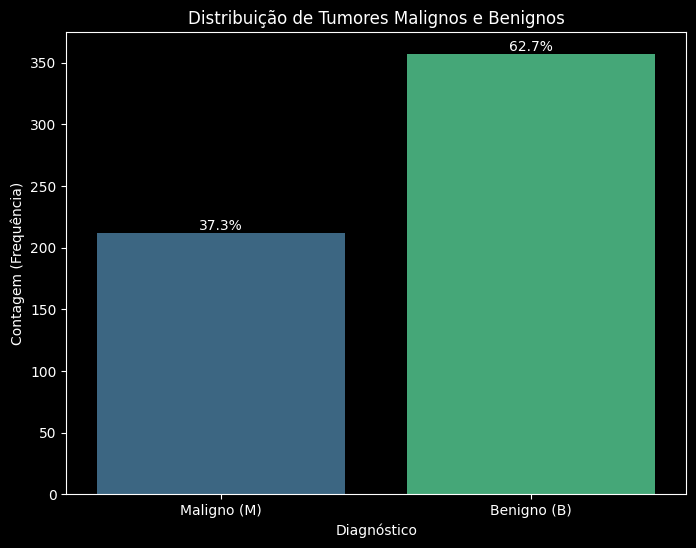

In [ ]:
plt.figure(figsize=(8, 6)) # Define o tamanho da figura para melhor visualização
ax = sns.countplot(x='diagnosis', data=data, palette='viridis', order=['M', 'B'], hue='diagnosis')
plt.title('Distribuição de Tumores Malignos e Benignos')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem (Frequência)') 
plt.xticks([0,1], ['Maligno (M)', 'Benigno (B)']) # Renomeia os rótulos do eixo x

total = len(data)
# Adiciona a porcentagem acima de cada barra
for p in ax.patches:
    count = int(p.get_height())
    percent = 100 * count / total
 
    ax.annotate(
        f'{percent:.1f}%',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom'       
    )

plt.show()



**Analise**:
- Gráfico revela um desbalanceamento de classes leve, proporção de 63%/37% 
- Embora não seja um desbalanceamento extremo (como 95% vs 5%), ele tem implicações diretas e cruciais para as próximas etapas.
- Necessidade de Estratificação: Ao dividir os dados em conjuntos de treino e teste (Etapa 3.3 do workflow), é fundamental usar a estratificação (stratify=y no train_test_split). Isso garante que a proporção de 63%/37% seja mantida tanto no conjunto de treino quanto no de teste, evitando que um dos conjuntos acabe com poucos ou nenhum exemplo da classe minoritária.
- Foco em Métricas Robustas: A análise deste gráfico nos força a pensar em métricas de avaliação mais adequadas para problemas médicos, que veremos na Etapa 5:
    - Matriz de Confusão: Para ver exatamente que tipos de erros o modelo está cometendo.
    - Recall (Sensibilidade): A métrica mais importante neste contexto. Ela mede a capacidade do modelo de identificar corretamente todos os casos positivos (malignos). Queremos um Recall altíssimo para a classe 'Maligno'.
    - Precisão: Mede, de todos os que o modelo disse serem malignos, quantos realmente eram.
    - F1-Score: Uma média harmônica entre Precisão e Recall.

*   [ ] **2.1.2. Análise da Distribuição das Features Numéricas:**
    *   [ ] **Tarefa:** Gerar **histogramas** para todas as 30 features numéricas para entender a forma de suas distribuições (ex: simétrica, assimétrica à direita/esquerda).
    *   **Impacto no Modelo:** Distribuições muito assimétricas podem ser candidatas a transformações (ex: logarítmica) para melhorar o desempenho de alguns modelos. tratamento de outliers na Etapa 3.

In [57]:
sorted(data.columns.tolist())


['area_mean',
 'area_se',
 'area_worst',
 'compactness_mean',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'diagnosis',
 'fractal_dimension_mean',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'id',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'smoothness_mean',
 'smoothness_se',
 'smoothness_worst',
 'symmetry_mean',
 'symmetry_se',
 'symmetry_worst',
 'texture_mean',
 'texture_se',
 'texture_worst']

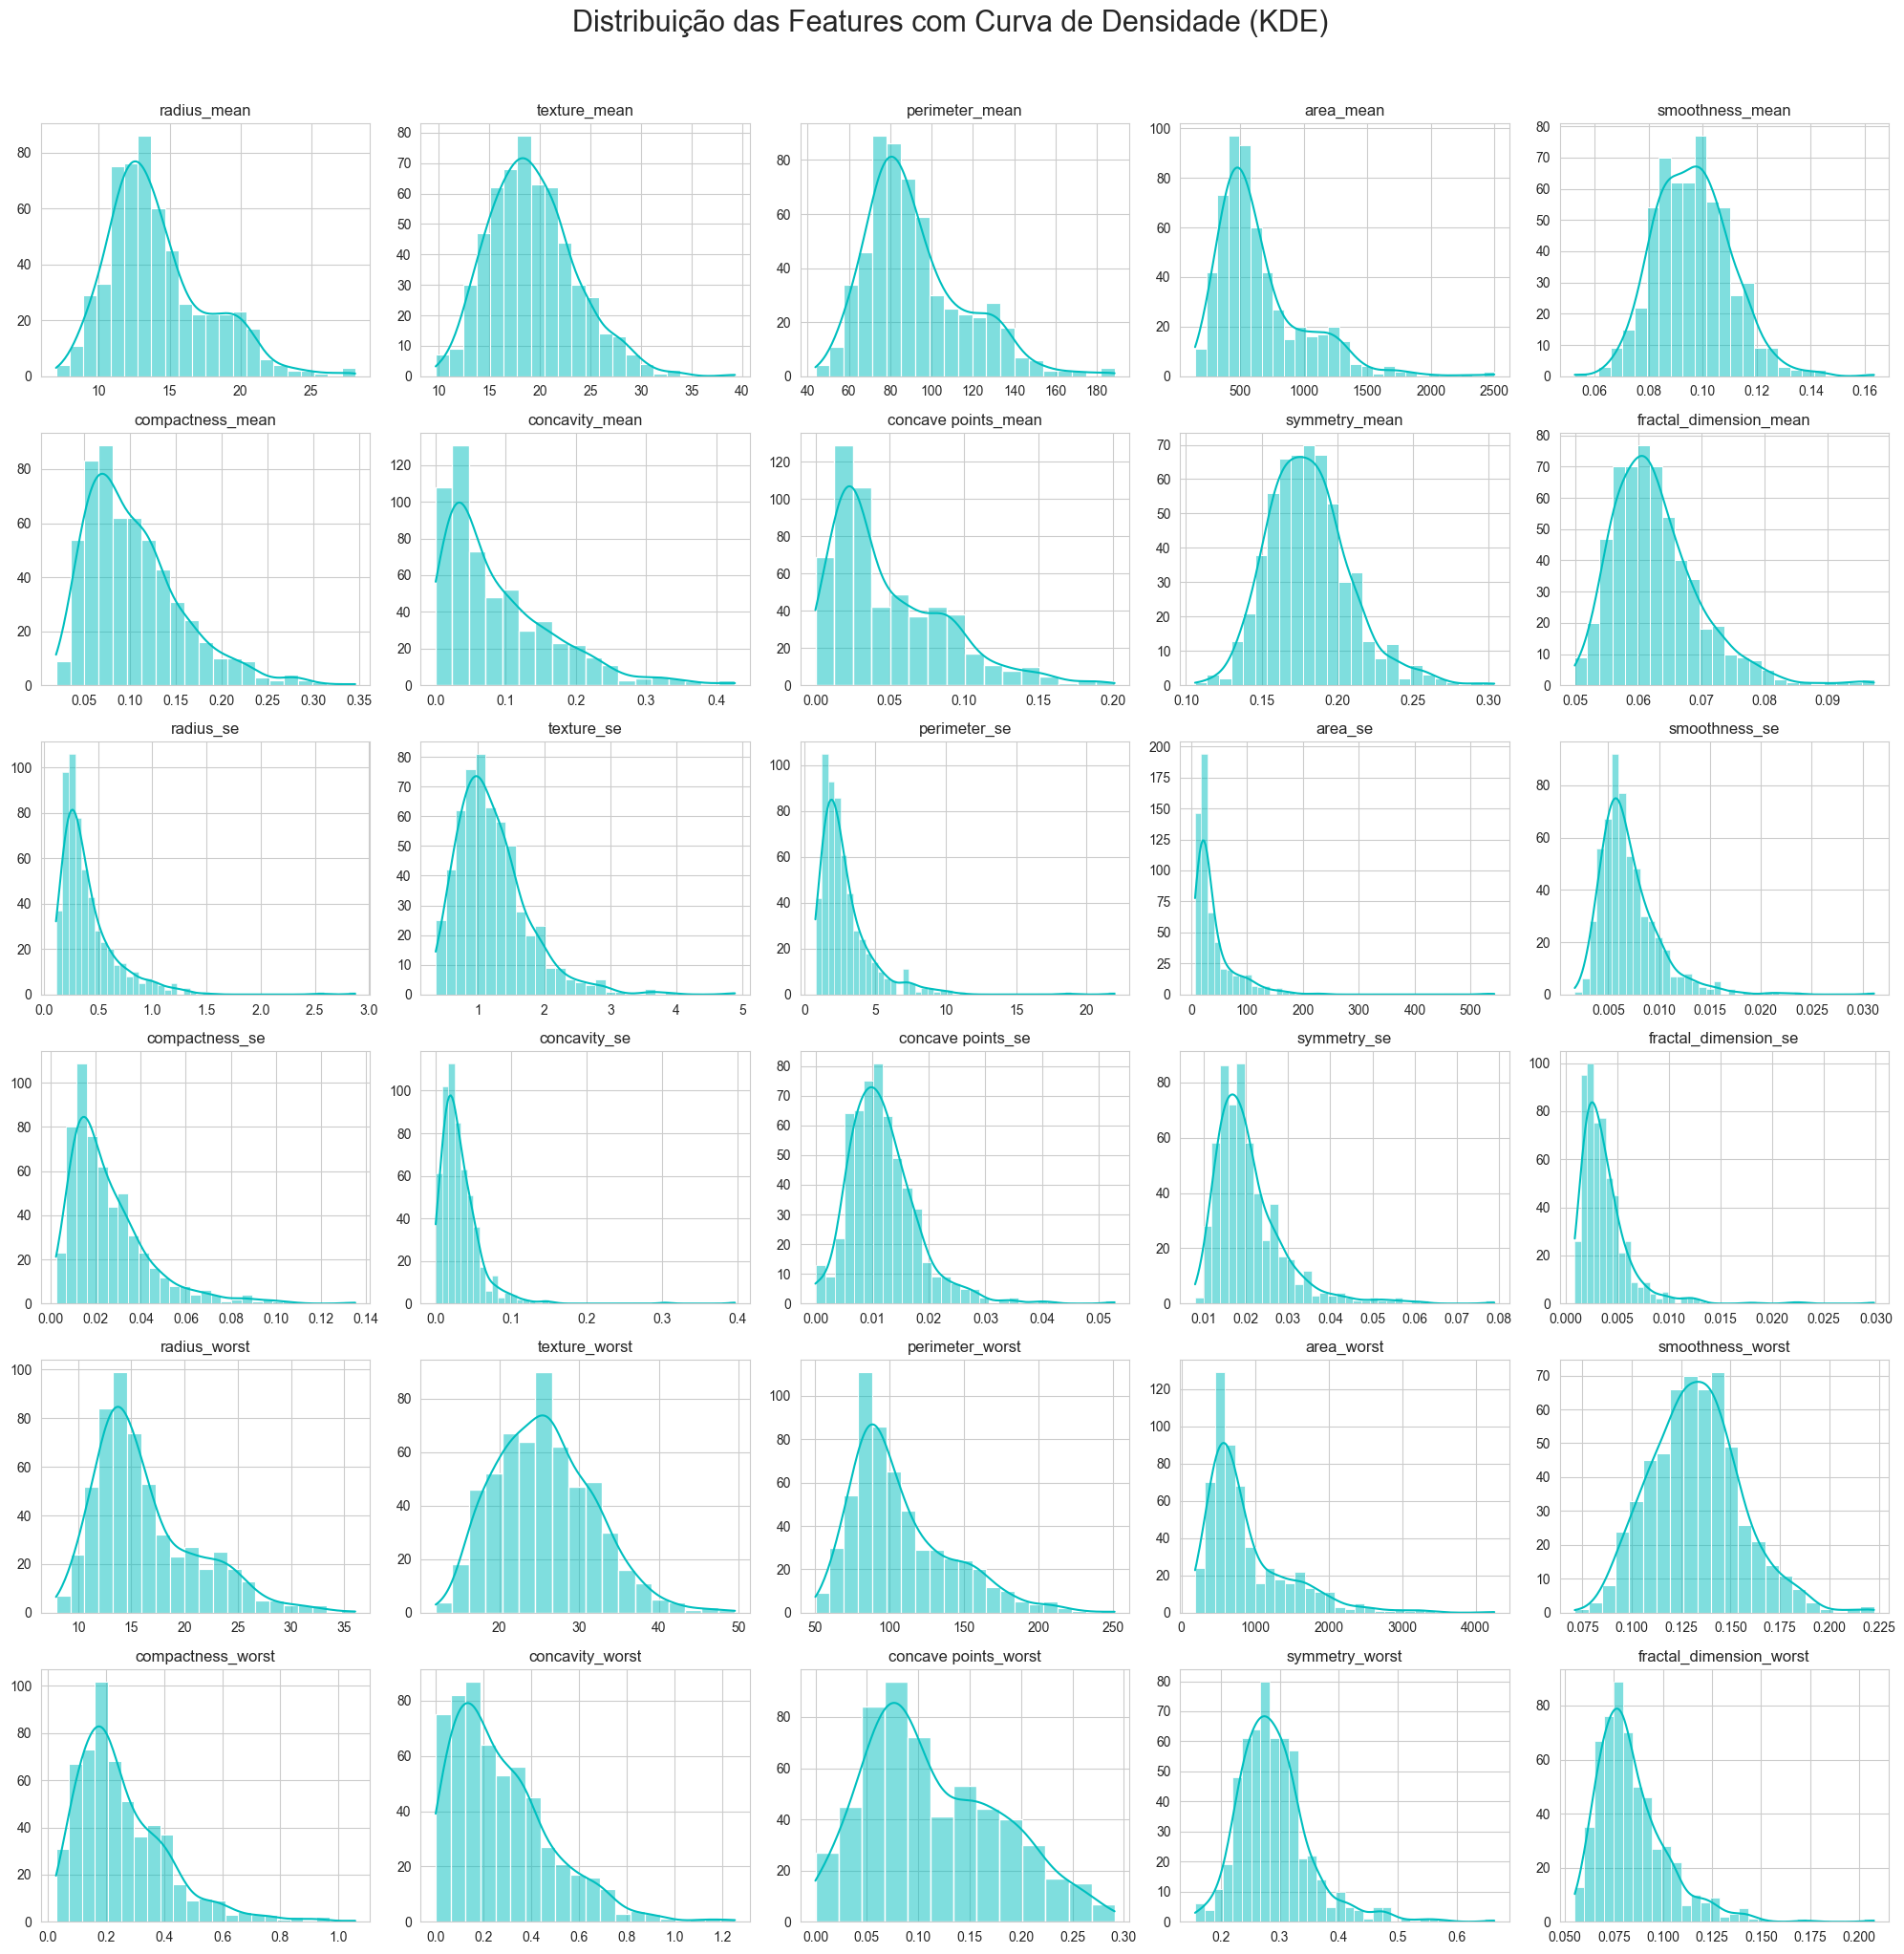

In [98]:

# Criar um DataFrame apenas com as features numéricas para a visualização
features_df = data.drop(columns=['id', 'diagnosis'])


# Definir o estilo visual
sns.set_style('whitegrid')

# Criar a grade de subplots (figura e eixos).
# Como temos 30 features, uma grade de 6 linhas x 5 colunas funciona perfeitamente.
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))

# O comando 'axes.flatten()' transforma a matriz 2D de eixos (6x5) em um array 1D,
# o que facilita a iteração sobre cada subplot no loop.
axes = axes.flatten()

# Loop sobre cada coluna do DataFrame e plotar o histograma no seu respectivo eixo
for i, col in enumerate(features_df.columns):
    # sns.histplot é a função principal.
    # data=features_df: O DataFrame a ser usado.
    # x=col: A coluna específica a ser plotada.
    # ax=axes[i]: Especifica em qual dos 30 subplots este gráfico deve ser desenhado.
    # kde=True: O grande diferencial! Adiciona a linha de densidade.
    sns.histplot(data=features_df, x=col, ax=axes[i], kde=True, color='c')
    
    # Adicionar um título a cada subplot para identificação
    axes[i].set_title(col, fontsize=12)
    
    # Remover os rótulos dos eixos X e Y para não poluir a visualização
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adicionar um título geral para toda a figura
plt.suptitle('Distribuição das Features com Curva de Densidade (KDE)', y=1.02, fontsize=22)

# Ajustar o layout para evitar que os títulos se sobreponham
plt.tight_layout()

# Mostrar o gráfico
plt.show()

Esta visualização mostra a distribuição de frequência de cada uma das 30 features numéricas do seu dataset. A grande revelação aqui é que muitas features não seguem uma distribuição "normal" de sino. Essa "estranheza" na forma das distribuições é exatamente o que as torna preditivas.

A forma de cada histograma nos dá pistas sobre o quão útil aquela feature será para distinguir entre um tumor Maligno ('M') e um Benigno ('B'). Podemos agrupar as formas que vemos em três padrões principais:

- Padrão 1: Distribuição Bimodal ou Fortemente Assimétrica à Direita (As Features Mais Promissoras)

    - O que é: O gráfico tem dois picos (bimodalidade) ou um pico principal à esquerda com uma "cauda" longa se estendendo para a direita (assimetria à direita). A curva `KDE` torna isso muito visível.
        - Um modelo de Machine Learning, mesmo um simples como a Regressão Logística, podera(?) encontrar facilmente um "ponto de corte" ótimo nessas features para separar as duas classes. Por exemplo, o modelo pode aprender uma regra como: "Se `area_worst` > 1000, a probabilidade de ser maligno é alta".
    - Hipótese-Chave: Cada pico ou "lombo" na distribuição provavelmente representa uma das classes. A grande concentração de valores menores (o pico da esquerda) tende a corresponder aos tumores benignos, enquanto a cauda longa ou o segundo pico (valores maiores) tende a corresponder aos tumores malignos.
    - Observe `radius_mean`, `perimeter_mean`, `area_mean`, `concavity_mean`, `concave points_mean` e, especialmente, suas contrapartes _worst.
    - Estas são as mais evidentes.
        - `radius_mean` / `radius_worst`
        - `perimeter_mean` / `perimeter_worst`
        - `area_mean` / `area_worst`
        - Insight: A curva KDE de `area_worst` é um exemplo clássico. Ela mostra um pico principal em torno de 500-750 e um segundo "lombo" claro começando em torno de 1250. Isso sugere fortemente que tumores com área "pior" (máxima) acima de um certo limiar são muito mais propensos a serem malignos.
    - Menos evidentes, porem chama atenção
        - `concavity_mean` / `concavity_worst`
        - `concave points_mean` / `concave points_worst`
        - `compactness_mean` / `compactness_worst`
        - `texture_worst` (mostra uma bimodalidade mais sutil que a `texture_mean`, que era normal)
        - Insight: A feature `concave points_worst` é interessante. Ela tem um pico muito nítido em valores próximos de zero (provavelmente os tumores benignos que são mais "lisos") e uma distribuição muito mais espalhada e com um segundo pico sutil para valores maiores (os tumores malignos com mais "pontos côncavos").

    - Impacto no Modelo: Features com este padrão são excelentes candidatas a serem fortes preditoras. Elas indicam que existe uma diferença clara na medição entre as duas classes.

- Padrão 2: Distribuição Próxima da Normal (Simétrica)
    - O que é: O gráfico tem a clássica forma de "sino", com a maioria dos valores concentrados no centro.
        - A maioria dos valores se concentra em torno de um pico central, que representa a média e a mediana (em uma distribuição perfeitamente normal, elas são iguais).
        - A frequência dos valores diminui de forma simétrica à medida que nos afastamos do centro, para ambos os lados.
        - A curva KDE sobreposta ao histograma terá um formato de sino claro e bem definido.
    - Hipótese-Chave: Para estas características, os valores dos tumores Benignos ('B') e Malignos ('M') provavelmente não são facilmente separáveis apenas com base naquela feature.
    - Isso sugere que há uma sobreposição considerável entre as medições de ambas as classes. Por exemplo, a "textura média" (texture_mean) de um tumor benigno pode ser muito semelhante à de um tumor maligno.
    - Diferente do Padrão 1, não há um "segundo pico" ou uma "cauda longa" que possamos associar claramente a uma das classes.
    - As features que mais claramente se encaixam neste padrão são:
        - texture_mean: Este é o exemplo mais clássico no seu gráfico. A curva KDE forma um sino quase perfeito, centrado em torno de um valor de aproximadamente 19.
        - smoothness_mean / smoothness_worst: Ambas mostram uma distribuição bastante simétrica em torno de seu valor médio.
        - symmetry_mean: Também exibe um formato de sino bem definido.
        - texture_worst: Embora um pouco mais espalhada, sua distribuição geral ainda é mais simétrica do que assimétrica.

    - Olhe para **texture_mean** e **smoothness_mean**. As curvas KDE têm um formato de sino quase perfeito. Elas são simétricas.
    - Impacto no Modelo: Essas features podem ser menos preditivas individualmente, mas ainda podem ser úteis em combinação com outras. Elas são "bem-comportadas" para modelos lineares. No entanto, elas ainda podem ser muito úteis! Em um modelo multivariado (que usa todas as features), a combinação de uma feature de Padrão 2 com outras pode ajudar a refinar a decisão e a separar casos que seriam ambíguos se olhássemos apenas para as features de Padrão 1.

- Padrão 3: Distribuições com Forte Assimetria e Pico em Zero)
    - O que é: descreve as features cujos histogramas mostram uma assimetria à direita extremamente acentuada e Um pico muito agudo em valores próximos de zero, com uma cauda extremamente longa.
        - A grande maioria dos valores está "espremida" em um pico muito alto e estreito, próximo de zero.
        - A partir desse pico, uma cauda muito longa e "rasa" se estende para a direita, representando poucos casos com valores mais altos.
        - A curva KDE para este padrão se parece com uma "descida de escorregador": começa muito alta perto de zero e cai rapidamente.
    - Hipótese-Chave: Isso é típico para features que medem erro ou variabilidade (se = standard error). A maioria dos tumores tem um erro padrão pequeno, mas alguns (potencialmente os mais anômalos ou malignos) têm erros maiores.
        - A grande concentração de valores perto de zero significa que, para a maioria dos tumores (tanto 'B' quanto 'M'), a variação ou o erro padrão das medições é muito pequeno. Ou seja, a maioria das células dentro de um mesmo tumor é bastante homogênea em relação àquela característica.
        - A cauda longa à direita representa os casos mais atípicos ou heterogêneos. São tumores onde as células apresentam uma variação muito maior entre si para aquela medida específica. É razoável hipotetizar que essa alta variabilidade pode estar associada a tumores Malignos ('M').
    - Praticamente todas as 10 features da segunda "família" (com o sufixo _se) se encaixam perfeitamente neste padrão:
        - `radius_se`
        - `texture_se`
        - `perimeter_se`
        - `area_se`
        - `smoothness_se`
        - `compactness_se`
        - `concavity_se`
        - `concave points_se`
        - `symmetry_se`
        - `fractal_dimension_se`
    - Impacto no Modelo: A grande maioria dos dados está "espremida" em uma pequena faixa. Uma transformação logarítmica (np.log1p) poderia ser aplicada a essas features na Etapa 3 (Pré-processamento) para "esticar" a escala e torná-las mais fáceis para o modelo interpretar.
    - Insights - Enquanto a maioria dos tumores é internamente consistente, alguns apresentam uma alta variabilidade interna. Essa heterogeneidade (a cauda longa dos gráficos _se) pode ser, por si só, uma característica importante para identificar tumores malignos.

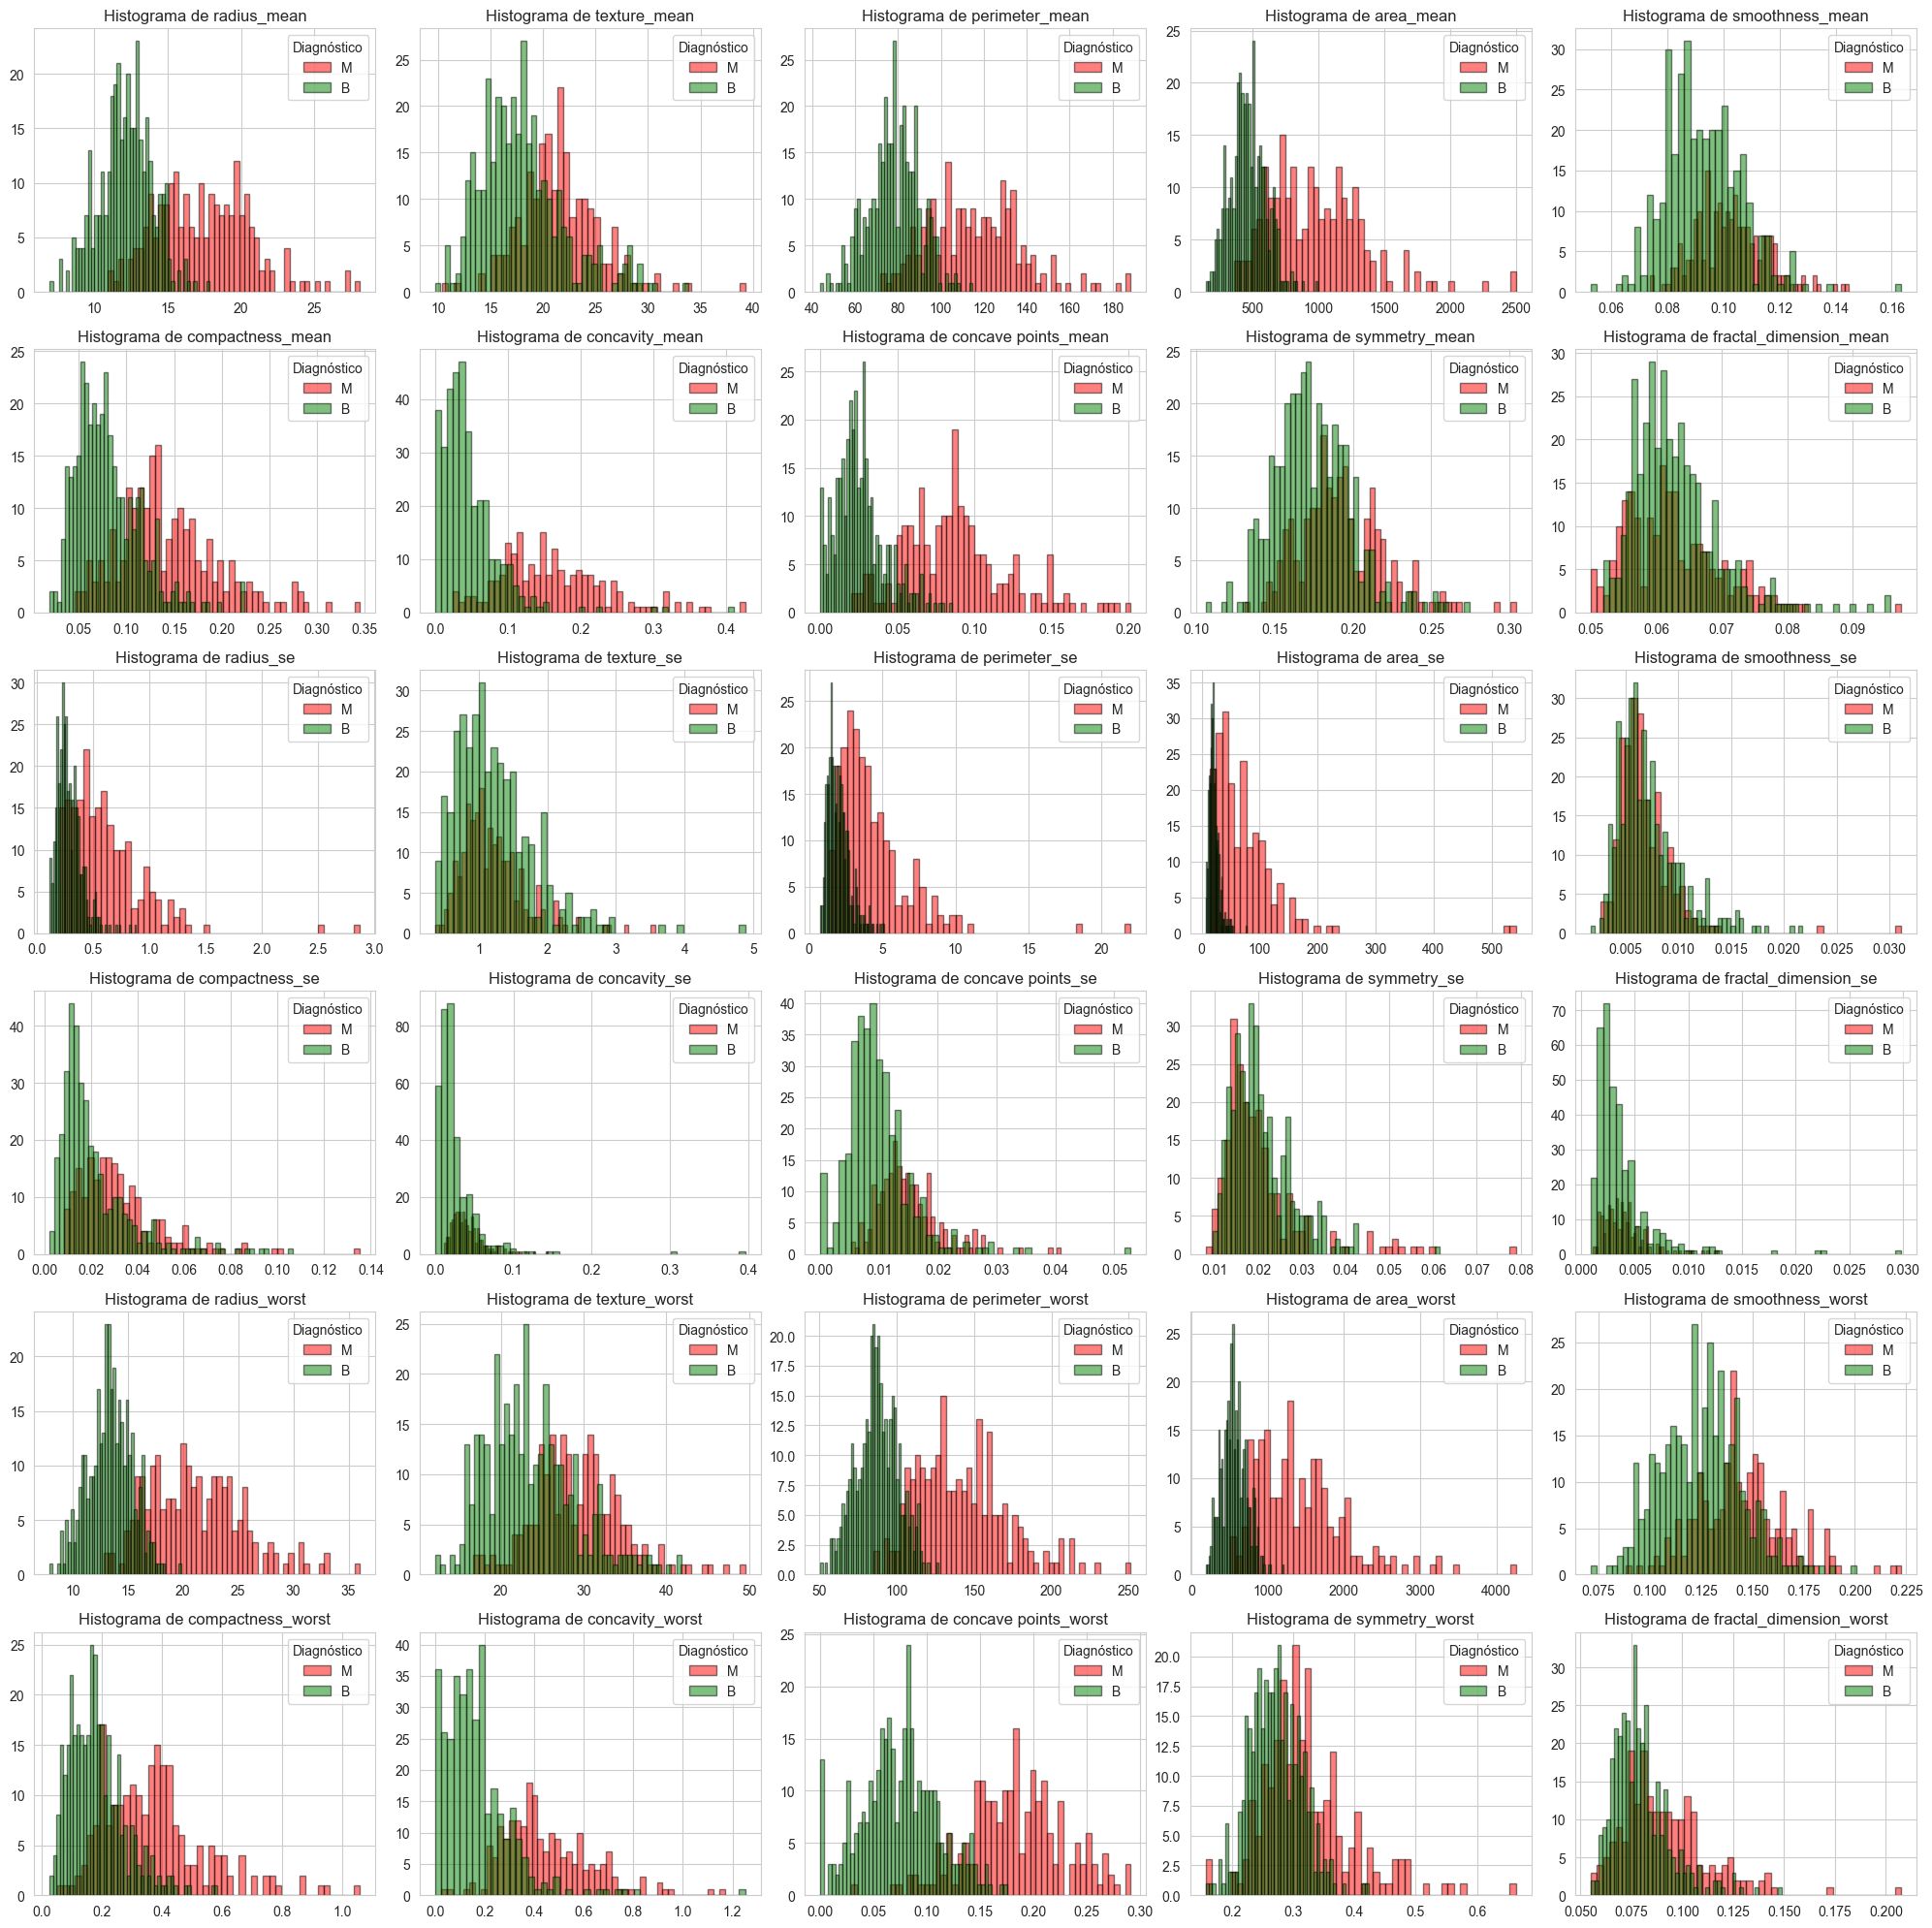

In [96]:
# Gera histogramas separados para cada classe de diagnóstico ('M' e 'B') para todas as features numéricas

# Lista de colunas numéricas (exceto id e diagnosis)
colunas_numericas = [col for col in data.columns if col not in ['id', 'diagnosis']]

# Define o número de colunas e linhas para os subplots
n_colunas = 5
n_linhas = int(np.ceil(len(colunas_numericas) / n_colunas))

# O comando 'axes.flatten()' transforma a matriz 2D de eixos (6x5) em um array 1D,
# o que facilita a iteração sobre cada subplot no loop.


#plt.figure(figsize=(20, n_linhas * 4))
sns.set_style('whitegrid')
axes = axes.flatten()
# Criar a grade de subplots (figura e eixos).
# Como temos 30 features, uma grade de 6 linhas x 5 colunas funciona perfeitamente.
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))


for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(n_linhas, n_colunas, i)
    # Plota histogramas sobrepostos para cada classe
    try:
        for classe, cor in zip(['M', 'B'], ['red', 'green']):
            subset = data[data['diagnosis'] == classe]
            plt.hist(
                subset[coluna],
                bins=50,
                alpha=0.5,
                label=f'{classe}',
                color=cor,
                edgecolor='black'
            )
        plt.title(f'Histograma de {coluna}')       
        plt.legend(title='Diagnóstico')
        
    except Exception as e:
        print(f"Erro ao plotar histograma para {coluna}: {e}")

plt.tight_layout()
plt.show()

Enquanto a primeira grade de histogramas nos mostrou a distribuição geral de cada feature, esta nova visualização vai um passo além: ela separa essa distribuição por classe, mostrando um histograma para os tumores Malignos (vermelho) e outro para os Benignos (verde), sobrepostos; quanto menor a sobreposição entre as distribuições vermelha e verde, mais preditiva é a feature. Uma separação clara entre as duas cores significa que a variável, sozinha, já é muito boa para distinguir entre um tumor maligno e um benigno.

- Padrão 1: Distribuição Bimodal ou Fortemente Assimétrica à Direita (As Features Mais Promissoras)
    - Histogramas com dois "lombos" ou uma cauda longa à direita. Nossa hipótese era que cada lombo/cauda representava uma classe. A distribuição verde (Benigno) corresponde perfeitamente ao pico principal, concentrado em valores mais baixos. A distribuição vermelha (Maligno) corresponde perfeitamente ao segundo lombo ou à cauda longa à direita, concentrada em valores mais altos.
    - Exemplo: area_worst -> A maioria esmagadora dos tumores com área < 1000 é benigna (verde). A maioria esmagadora dos tumores com área > 1000 é maligna (vermelho). A separação é muito clara. Isso nos diz que features de tamanho e forma são os preditores mais fortes.
    - Poderemos utilizar todas as features _worst relacionadas a tamanho e forma (radius_worst, perimeter_worst, area_worst, concavity_worst, concave points_worst) para prever se um tumor é Benigno ou Maligno. A separação entre as distribuições verde e vermelha é indicativa.
    
- Padrão 2: Distribuição Próxima da Normal (Simétrica)
    - Histogramas em formato de sino, sugerindo que as classes poderiam estar misturadas.  As distribuições vermelha e verde têm uma sobreposição muito maior. Embora a distribuição vermelha (M) esteja ligeiramente deslocada para a direita (indicando que tumores malignos tendem a ter, em média, valores um pouco mais altos para essas features), não há um ponto de corte claro. Muitos tumores benignos e malignos compartilham valores semelhantes para textura e suavidade.
    - Estas features são preditores mais fracos individualmente, mas a diferença nas médias ainda pode ser útil para o modelo em combinação com outras.
    - As versões _mean das mesmas features (radius_mean, etc.). A separação é clara, mas um pouco menos pronunciada que nas _worst

- Padrão 3: Distribuições com Forte Assimetria e Pico em Zero)
    - Um pico agudo em zero com uma cauda longa. Nossa hipótese era que a cauda longa representava os casos malignos, porem a distribuição verde (Benigno) está quase inteiramente concentrada no pico inicial próximo de zero. A distribuição vermelha (Maligno) é muito mais espalhada e compõe a maior parte da "cauda longa".
    - Tumores com alta variabilidade interna (erro padrão _se elevado) têm uma probabilidade muito maior de serem malignos. Esta é uma informação preditiva valiosa.

---



*   [ ] **2.1.3. Análise de Outliers:**
    *   [ ] **Tarefa:** Gerar **boxplots** para todas as 30 features para identificar visualmente a presença de outliers.
    *   **Impacto no Modelo:** Outliers podem distorcer o treinamento de modelos sensíveis a eles (como SVM). Esta análise informa a necessidade (ou não) de uma estratégia de

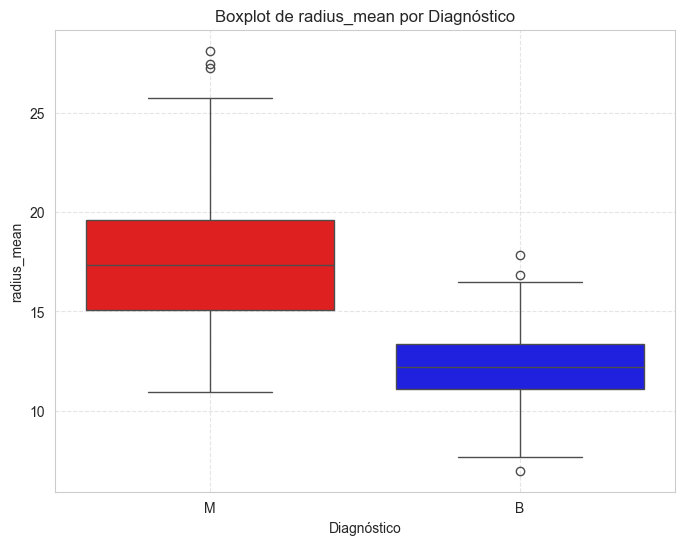

In [104]:
try:
    plt.figure(figsize=(8, 6))
    # Cria o boxplot usando seaborn, separando por diagnosis
    ax = sns.boxplot(
        data=data,
        x='diagnosis',
        y='radius_mean',
        hue='diagnosis',
        palette={'M': 'red', 'B': 'blue'}
    )
    plt.title('Boxplot de radius_mean por Diagnóstico')
    plt.xlabel('Diagnóstico')
    plt.ylabel('radius_mean')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
except Exception as e:
    print(f"Ocorreu um erro ao gerar o boxplot: {e}")


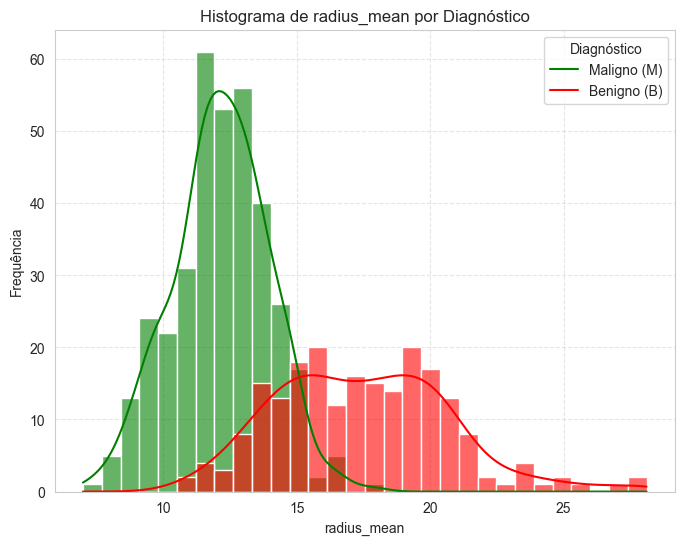

In [105]:
# Histograma da feature 'radius_mean' separado por classe de diagnóstico ('M' e 'B')
plt.figure(figsize=(8, 6))
sns.histplot(
    data=data,
    x='radius_mean',
    hue='diagnosis',
    bins=30,
    palette={'M': 'red', 'B': 'green'},
    alpha=0.6,
    kde=True
)
plt.title('Histograma de radius_mean por Diagnóstico')
plt.xlabel('radius_mean')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Diagnóstico', labels=['Maligno (M)', 'Benigno (B)'])
plt.show()

Analise 

### **2.2. Análise Bivariada (Análise de Pares de Variáveis)**
*   [ ] **2.2.1. Relação entre Features e a Variável Alvo (Seleção de Features):**
    *   [ ] **Tarefa:** Para cada uma das 30 features, criar um **boxplot ou violin plot** comparando sua distribuição para as classes 'M' e 'B'.
    *   **Impacto no Modelo:** Esta é uma das tarefas mais importantes. Ela permite **identificar visualmente as features mais preditivas**. Features cujas distribuições são muito diferentes entre as classes 'M' e 'B' (pouca sobreposição) são fortes candidatas a serem bons preditores.
*   [ ] **2.2.2. Relação entre Features Numéricas (Análise de Multicolinearidade):**
    *   [ ] **Tarefa:** Calcular a matriz de correlação (`.corr()`) e visualizá-la com um **heatmap** (`seaborn.heatmap`).
    *   **Impacto no Modelo:** Identificar pares ou grupos de features com correlação muito alta (ex: > 0.9). A multicolinearidade pode desestabilizar os coeficientes de modelos lineares (como Regressão Logística) e indica redundância de informação, justificando o uso de PCA.

### **2.3. Análise Multivariada (Análise de Múltiplas Variáveis em Conjunto)**
*   [ ] **2.3.1. Análise de Separabilidade de Classes com PCA:**
    *   [ ] **Tarefa:** Aplicar `StandardScaler` seguido de `PCA(n_components=2)` nos dados. Em seguida, criar um **gráfico de dispersão (scatter plot)** com os dois primeiros Componentes Principais (PC1 vs PC2), colorindo os pontos pela variável `diagnosis`.
    *   **Impacto no Modelo:** Esta é a tarefa que **valida a viabilidade do projeto**. Se as classes 'M' e 'B' formarem clusters visualmente separáveis neste gráfico 2D, isso é um forte indicador de que um modelo de classificação terá sucesso. Se os pontos estiverem completamente misturados, o problema é muito mais difícil.

## **Etapa 3: Pré-Processamento e Engenharia de Features**

_Objetivo: Transformar os dados brutos em um formato otimizado para o treinamento de modelos de Machine Learning, aplicando as decisões tomadas na EDA._

*   [ ] **3.1. Definir Features (X) e Alvo (y):** Separar o DataFrame.
*   [ ] **3.2. Codificação da Variável Alvo:** Converter `diagnosis` para numérico (M=1, B=0).
*   [ ] **3.3. Divisão em Treino e Teste:**
    *   [ ] **Tarefa:** Usar `train_test_split` para dividir X e y.
    *   **Impacto no Modelo:** Usar `stratify=y` para garantir que a proporção de classes 'M' e 'B' seja a mesma nos conjuntos de treino e teste. Isso é crucial para uma avaliação justa, especialmente com dados desbalanceados.
*   [ ] **3.4. Escalonamento de Features:**
    *   [ ] **Tarefa:** Inicializar `StandardScaler`, treiná-lo (`.fit()`) **apenas com `X_train`** e aplicá-lo (`.transform()`) em `X_train` e `X_test` para evitar vazamento de dados.
*   [ ] **3.5. Redução de Dimensionalidade (PCA para Modelagem):**
    *   [ ] **Tarefa:** Inicializar e treinar o PCA (`.fit()`) **apenas nos dados de treino escalonados**. Aplicar a transformação (`.transform()`) em ambos os conjuntos.
    *   **Impacto no Modelo:** Cria um novo conjunto de dados (ex: `X_train_pca`, `X_test_pca`) para treinar um modelo mais simples e potencialmente mais rápido, livre de multicolinearidade.

## **Etapa 4: Modelagem e Treinamento**

*   [ ] **4.1. Escolher um Modelo de Baseline:**
    *   [ ] **Tarefa:** Selecionar um modelo simples e interpretável para servir como ponto de partida.
    *   **Impacto no Modelo:** A Regressão Logística é uma excelente escolha de baseline para problemas de classificação binária, pois seus coeficientes podem ser inspecionados.
*   [ ] **4.2. Treinar os Modelos:**
    *   [ ] **Tarefa 1:** Treinar o modelo de baseline nos dados escalonados com todas as features (`model.fit(X_train_scaled, y_train)`).
    *   [ ] **Tarefa 2:** Treinar o mesmo modelo nos dados reduzidos pelo PCA (`model_pca.fit(X_train_pca, y_train)`).

## **Etapa 5: Avaliação Pós-Modelo e Análise de Desempenho**

_Objetivo: Ir além de uma única métrica (acurácia) para entender *como* e *onde* o modelo acerta e erra._

*   [ ] **5.1. Fazer Previsões:**
    *   [ ] **Tarefa:** Usar os modelos treinados para fazer previsões no conjunto de teste (`.predict(X_test_scaled)` e `.predict(X_test_pca)`).
*   [ ] **5.2. Calcular Métricas de Classificação:**
    *   [ ] **Tarefa:** Para ambos os modelos, calcular: Acurácia, Precisão, Recall, F1-Score e a Área Sob a Curva ROC (AUC).
    *   **Impacto no Modelo:** A análise conjunta dessas métricas dá uma visão completa. Em um problema médico, o **Recall** (taxa de verdadeiros positivos) é frequentemente a métrica mais importante (queremos minimizar os falsos negativos – pacientes com câncer diagnosticados como saudáveis).
*   [ ] **5.3. Análise da Matriz de Confusão:**
    *   [ ] **Tarefa:** Gerar e visualizar a matriz de confusão para ambos os modelos.
    *   **Impacto no Modelo:** Esta é uma análise de erro fundamental. Permite quantificar e interpretar os tipos de erro que o modelo comete:
        *   **Falsos Positivos (FP):** Pacientes saudáveis diagnosticados com câncer.
        *   **Falsos Negativos (FN):** Pacientes com câncer diagnosticados como saudáveis (o erro mais perigoso neste contexto).
*   [ ] **5.4. Análise Comparativa e Conclusão:**
    *   [ ] **Tarefa:** Comparar o desempenho (métricas e matriz de confusão) do modelo com todas as features contra o modelo com dados reduzidos pelo PCA.
    *   **Impacto no Modelo:** Avaliar o trade-off: a PCA reduziu a complexidade e o tempo de treino? Isso veio ao custo de uma queda significativa no desempenho (especialmente no Recall)? Essa análise informa se a redução de dimensionalidade foi uma estratégia vantajosa para este problema específico.

## **Etapa 6: Conclusão Final e Próximos Passos**

*   [ ] **6.1. Documentar Resultados:** Sumarizar qual modelo (completo ou PCA) teve o melhor desempenho balanceado, com foco na métrica de negócio mais importante (Recall).
*   [ ] **6.2. Propor Melhorias:** Sugerir próximos passos, como:
    *   Testar algoritmos mais complexos (ex: `RandomForest`, `XGBoost`).
    *   Realizar otimização de hiperparâmetros (`GridSearchCV`).
    *   Investigar os erros do modelo (os Falsos Negativos) para entender se há algum padrão neles.
    